# Generative Graphic Score : *falling down stairs of light*

Yew Brown  
Student ID: 33880799  
BSc Creative Computing  
Generative Drawing  
Goldsmiths, University of London  
12.01.2026  

Submission and supporting media also available on GitHub: 
https://github.com/ybrow001/generative_graphic_score

---

## Introduction

*falling down stairs of light* is a generative graphic score and work-in-progress indeterminate and improvisational music composition, centring harp. This document covers and contextualises the development process of the graphic score for this piece.

The score for *falling down stairs of light* utilises stochastic generative processes incorporating guassian probabilistic distributions, to draw many passes of vertical lines across a digital canvas. Lines representing sunlight cascading through clouds, leaves, branches and glass; harp strings falling along the trajectory of the light rays, sounding to illustrate how they hit surfaces and pass freely.

The generative process forming this score, and its final output, inform the performance of the musical composition. 
Performers can play straight from the output, as a static curtain of lines, as they see fit. Or they can set up a drawing machine, passed an SVG file of the output, interpreting the lines as they are drawn one by one. Follwing the process of determining them, and interpreting the emergent tangle that eventually begins to form.

## Concept & Background Research

Conceptualisation of *falling down stairs of light* began in the spring of 2025, when I was reading All the Lovers in the Night by Mieko Kawakami. In one particular passage of the novel, Kawakami describes the main character, Fuyuko, having a synesthetic fantasy about stairs made of light, while listening to a Chopin piece<sup>1</sup>. The passage also conveying that Fuyuko is feeling a sense of openness towards life, that she is capable of becomeing less stuck in her ways.

### Personal Practice & Core Influences

Many of my previous musical works feature light and natural imagery as central themes and influences **(ref. spring twilight or wolcnuonþærelyfte)**. Following this thematic thread, when watching afternoon light filtering scading through tree canopies, the imagery from All the Lovers in the Night came to mind, but as a source for sound creation; the idea of a harp falling down stairs of light. Building on that concept lead to the creation of this composition and the idea for this score: lines drawn through stochastic, generative processes imitating sunlight cascading through clouds, trees branches and windows. 
Similarly, the feelings of excitement, emotional lightness, openness towards and freedom expressed by Kawakami, also fed into the conceptualisation of the appearance of the score.

An earlier influence in the creation of this score, was my experience as a participant in of ICA Creatives Sound, at the Institute of Contemporary Art (ICA) in London, between November 2023 and May 2024. In a series of workshops we explored the collective development and exploration of sonic art, with a significant focus on the creation of graphic scores.
The workshops culminated in a collective performance at the ICA from the participants. As a part of this performance we ran a graphic score workshop for audience members, to create scores based off of prompts that we had made as a group. These graphic scores were then projected onto a screen, and interpreted as free improvised music and sonification by the collective back to the audience **(ref. Ceris's Soundcloud or ICA?)**.

The experience as a part of ICA creatives, gave me useful insight into the ability of performers to spontaneously interpret abstract scores with little direction, in order to produce joyful, engaging and enteraining performances. This insight is something I have carried forward into my considerations for this graphic score, in how abstract it is able to be with its representations of sound for the performer to interpret.

At a similar time to the ICA performance in 2024, I composed a piece called *love's song* **(ref)**. This piece explores the indeterminate interpretation of a score, by the performer improvising use of pre-composed melodic fragments and instructions within specified windows of time. The score features fragments of melody in traditional notation accompanied by instructions on a single side of paper.

Acknowledging *love's song*, going into *falling down stairs of light* I wanted to explore greater uncertainty and fluid structure through computational processes in the generattion of unique scores for each performance, and how this could come across in sound of the piece. 

Some further research conducted includes renowned graphic score works, as reference points for sonic representation and instruction, as well as musical works as reference for musical features and aesthetics.

### Further Influences & Research

These works include John Cage's *Fontana Mix* **(ref)**, Cornelius Cardew's *Treatise* **(ref)** as references for graphic score. 
Cardew's score, while a great example of archetectural and psychologically driven design, had little influence on the end result of this score, besides its openess for interpretation and abstract forms. As these domains in the of creation of graphic scores, was not of direct concern for this piece as technical processes in applying computational generative techniques was the more significant focus.
*Fontana Mix*, although not computational, influenced some of my choices through its variablity across multiple uses, and the application of ambient and non-musical sounds in present in its interpretations.

More explictly sonic influences include the textures and spaciousness of works by the artist sawako **(ref)**, inclusion of harp glissandi and improvisation in works by Alice Coltrane **(ref)**, as well as improvisation and static harmony featuring on Miles Davis' In A Silent Way **(ref)**). Elements of all of these contributed to compositional choices in the sound of the piece, which are reflected in the score. For example, lines' textures and trajectories representing descending glissandi, or the progressive tangling of lines representing open choice and freedom in improvisation.

---

## Technical Implementation

The technical choices made in the developement of this score aimed to support the creative concept of the piece. Choises such as giving lines a bias to skew towards the right of the canvas, X axis variation for a wavering texture and structuralised dynamic variation of the skew and X deviation intensity, serve as technical ways of mimicking cascading light in the visual output of the code.

Beginning the development process of the code of *falling down stairs of light*, a completed version of the Line Tracing programme code from Generative Drawing, Lab 1 **ref. include on GitHub**, was utilised as a strating point. 
Knowing that the graphic score would include contoured, vertically drawn lines, the Line Tracing code was a perfect starting point, as it does both those things, although in a slightly different and simpler way.  
Building on top of the Line Tracing code, the tracing behaviour was removed, but the mechanism for contouring the lines, was kept; contours were then determind by deviating X axis values along vertical nodes - spaced by visualisation of harmonic ratios, between just intervals forming an extended chord and full scale clusters derived from the harp tuning utilised in the composition. 

- images of developent stage results
- code examples?

Following this, further probabilistic randomisation, refinement and bug fixes were added to the code. To bring the code closer to its desired result. These randomisation processes involed selecting which nodes to assign randomised X values to, and subtly randomising the Y positions of nodes. Introducing more interesting textures to the lines.

- images
- code examples?

Other additions included multiple passes of the canvas, drawing new lines in between and overlapping with previous ones. Setting up the mechanism for structure dynamics.

- images
- code examples?

Dynamic structural elements were then introduced. These elements use randomisation of structural positions on the canvas - X position of nodes, and across time - pass of the canvas being drawn; repectively called the micro and macro dynamic processes.

- images

Further development of these structural functions added the use of guassian distributions in their randomisation processes. Distributing randomised positions around a central value, with exponentially decreasing probability either side positively or negatively. This distribution of probilities, more closely representing natural and aesthetically pleasing distributions than the linear randomisation used prior.
Guassian distributions of proability were also simultaneously extended to all other randomisation process established within other functions in the code.

- images

Towards the end of the development process a line skew was added, using randomisation to give lines a diagonal bias towards the right of the canvas, or positive X value bias. This change helped further represent the impression of trajectories of cascading light, added more interesting texture through new overlaps and relationships between lines. From another interpretation, also creating a folding fabric-like texture to the emergent whole of woven lines.

- image

Minor tweaks here and there, explorations with colour, values and contraints of randomisation ranges ensued. Experimenting with the appearance of the score and ironing out bugs. 

A final adjustment, leading to the current stage reframed the individual lines and emergent whole on the canvas, creating space and showing all the stray line ends. This was done by compressing the ranges of Y values that lines nodes were mapped between, as well as the X values lines could be drawn between; rescaling line spacing and other related values.
Reframing the score allows it more space, a more dynamic, varied outline and a sense of weightlessly floating in the air, previously missing.

- image

### Implemented Techniques

The code makes use of modularity through functions, delegated purposes by considering serparation of concern. These functions make frequent use of loops, in order to iterate of large quanitities of calculations and processes.

Classes did not, however, feel necessary to implement for the purposes needed in this code - functions largely seeming sufficient.
Upon further development a class grouping together line and node calculation and drawing, may be useful to implement. This would potentialy tidy up the code, if for example, many instances of a line object might be used. Methods and initialisation arguments of objects could potentially create a means of easily altering variables, controlling certain generation features - such as range X value variations and intensity of dynamic process scaling.

The code also makes use of python libraries through the importing of "random" and "numpy", for use in randomisation processes.

Note: Some comments for further development and old or alternate randomisation values have been left in intentionally, for aiding continued work or reuse.



### Code Examples

The following examples demonstrate how some of the key functions within the code work in isolation.

The first demonstration is of the line and node calculation and determining function. The purpuse of this function is to first calculate all of the Y values for each node along the full length of a single line, then determine which of those nodes will be included in the drawn line, via probability - this probabiltiy being determined by randomised values within a guassian distribution of probabilties, itself determined by the dynamics functions within the context of the full code.

This functions contains a few layers of nested loops:  
The outer loop iterates over the number of lines that will span the canvas horizonally, determined by the width of the draw area divided by the global line spaceing value. 
The inner loops fall into two separate sub loop nests within the outer line loop. The outer and inner loops of both groups iterate over the number of node sizes in the polyrhythm_nodes list first, then for each iteration of that loop, the values of the individual nodes in the polyrhythm_node list are used to iterate over the line length.  
The first sub loops dividing the line length by the node values, the second sub loops probabilistically determining if each node along the line length will be drawn or not.

This function determines how the lines of the score will be drawn in varied, unique way every repetition of the processes. Thereby also creating unique scores with a common identity every full generation.

The printed outputs show the Y values calculated for each node first, then the seleted nodes for each line.

In [58]:
# line calculation demonstration

from py5canvas import *
import numpy as np

# mock variables

mock_width = 100;
mock_height = 50;
mock_line_spacing = mock_width / 1;
# mock scaled to 1 line and smaller values, to reduce amount of output printed

mock_micro_node_density = np.random.normal(1.167,1.000);
mock_macro_node_density = np.random.normal(1.167,0.667);

# -- isolated code --

polyrhythm_nodes = [24,27,30,33,36,40,45]

# initalise empty lists for use in calculate_lines
line_calcs = []
summed_line = []

def calculate_lines(): # todo: possibly separate into two functions calc and sum - better modularity
    global line_calcs, summed_line

    # reset global variables as empty lists
    line_calcs = []
    summed_line = []

    # loop for number of lines in horizontal drawing area
    for lin in range(int((mock_width)/mock_line_spacing)):
        summed_line.append([]) # create new nested array for each line
        
        # calculate y values for each component pulse in the polyrhythm 
        for i in range(len(polyrhythm_nodes)):
            calc_y = mock_height * 0.1
            line_calcs.append([])
            for j in range(polyrhythm_nodes[i]):
                line_calcs[i].append(calc_y)
                calc_y += int(((mock_height*0.8)-10)/polyrhythm_nodes[i])
                # print(calc_y)

        # sum calculated line nodes
        for i in range(len(polyrhythm_nodes)): # loop for number of nodes
            for j in range(polyrhythm_nodes[i]): # loop for specific node values
            # 1/3 chance that a node is selected for use per component node in polyrhythm - random pattern generation
                node_select = np.random.normal(1.167,1.167) # probability of drawing node - was random.uniform(0,2.33)
                node_chance = mock_micro_node_density + mock_macro_node_density
                if node_select < node_chance: 
                    summed_line[lin].append(line_calcs[i][j])
            # limit gaussian distributions of probability within range
            if node_select < node_chance: 
                summed_line[lin].append((mock_height*0.8)-5)   

        summed_line[lin].sort() # for readability when printing

    # mock output
    print(line_calcs)
    print(summed_line)
    
        
calculate_lines()

[[5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0, 20.0, 21.0, 22.0, 23.0, 24.0, 25.0, 26.0, 27.0, 28.0], [5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0, 20.0, 21.0, 22.0, 23.0, 24.0, 25.0, 26.0, 27.0, 28.0, 29.0, 30.0, 31.0], [5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0, 20.0, 21.0, 22.0, 23.0, 24.0, 25.0, 26.0, 27.0, 28.0, 29.0, 30.0, 31.0, 32.0, 33.0, 34.0], [5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0], [5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0], [5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.

The second example demonstrates the process of determining structural dynamics. Where the peaks of intensity will occur in the generation process of a full score, by the determination through randomisation of X values that guassian distributions of probabilities will be centred on. These positions are both an X positon along the canvas per pass of it, and a pass number per full generation of the score. 
Determined centres of dynamic peaks are used to check against the pass number and X position currently being drawn at, at any given time in the generation process. The closer X and draw pass values fall to the middle of the gaussian distribution, centred on the dynamic peak, the higher the probability that the dynamic variables (X deviation, X bias, et certera) are scaled up by a greater value.

Breaking the component functions down further in order from top to bottom, the functions used in this example serve to calculate the guassian distribution, where each dynamic peak falls - by X value per individual pass and by pass per score, and the amount of deviation to apply to node's X values, as scaled by the guassian distribution function.

The printed outputs show:  
1. The scaling value determined by the gaussian distribution function, checking the value of an X position against the dynamic centre and distribution around either side of it.
2. The micro and macro dynamic peaks of the score, out of all passes and per pass out of all X values, respectively.
3. The centre value of a further guassian randomisation, applied to nodes's X values, and the range of the distribution either side of the centre - the "loc" and "scale" arguments of "numpy.random.normal()". Used to individually randomise nodes' X value deviation.
 

In [ ]:
# dynamic structure & gaussian distribution demonstration

from py5canvas import *
import random
import numpy as np

# mock variables

mock_width = 1000
mock_passes = 19
mock_draw_pass = 11
mock_current_x = 385

# calculate gaussian field centred on determined x position per pass
def mock_gaussian_field(current_pos, centre, range):
    return np.exp(-((current_pos - centre)**2) / (2 * range**2)) 

mock_macro_pos = 0
mock_micro_pos = []

# determine which pass of the canvas to centre macro dynamic peak on
def mock_dynamic_form(mock_passes): 
    mock_divisions = [0,1,2,3,4,5] # positions along the duration of the score (no. passes) the macro peak can occur

    mock_macro_pos = int((mock_passes/5) * random_choice(mock_divisions)) # which pass to centre gaussian dynamic peak on

    for p in range(mock_passes): # do for each pass
        mock_micro_pos.append(int(((mock_width*0.33)/5) * random.choice(mock_divisions)))

    print(mock_macro_pos, mock_micro_pos)
            
    return [mock_macro_pos, mock_micro_pos] 

#  -- dynamic variations per individual pass of the canvas --

def mock_micro_x_variation(mock_draw_pass, mock_current_x):
    mock_x_var_loc = 7
    mock_x_var_scale = 12

    mock_centre = mock_micro_pos[mock_draw_pass - 1]
    mock_sigma = (mock_width*0.33)/5 # gaussian application of dynamics either side of centre x value per pass
    mock_gaussian_weight = mock_gaussian_field(mock_current_x, mock_centre, mock_sigma)

    if mock_gaussian_weight < 0.05:
        mock_gaussian_weight = 0.05

    mock_x_var_loc = abs(mock_gaussian_weight * np.random.normal(7,5)) 
    mock_x_var_scale = abs(mock_gaussian_weight * np.random.normal(9,7))

    return [mock_x_var_loc, mock_x_var_scale]

print(mock_gaussian_field(385, 400, 30))
print(mock_dynamic_form(mock_passes))
print(mock_micro_x_variation(mock_draw_pass, mock_current_x))

0.8824969025845955
4 [0, 0, 6, 0, 19]
[4, [0, 0, 6, 0, 19]]
[np.float64(0.48603874777107736), np.float64(0.8261391431393856)]


---

## Complete Code for *falling down stairs of light*

0 [0, 330, 0, 0, 550, 550, 440, 440, 550, 220, 0, 220, 110, 330, 220, 550, 550, 220, 0, 0, 0, 0, 330, 0, 550, 440, 550, 0, 440, 220, 330]


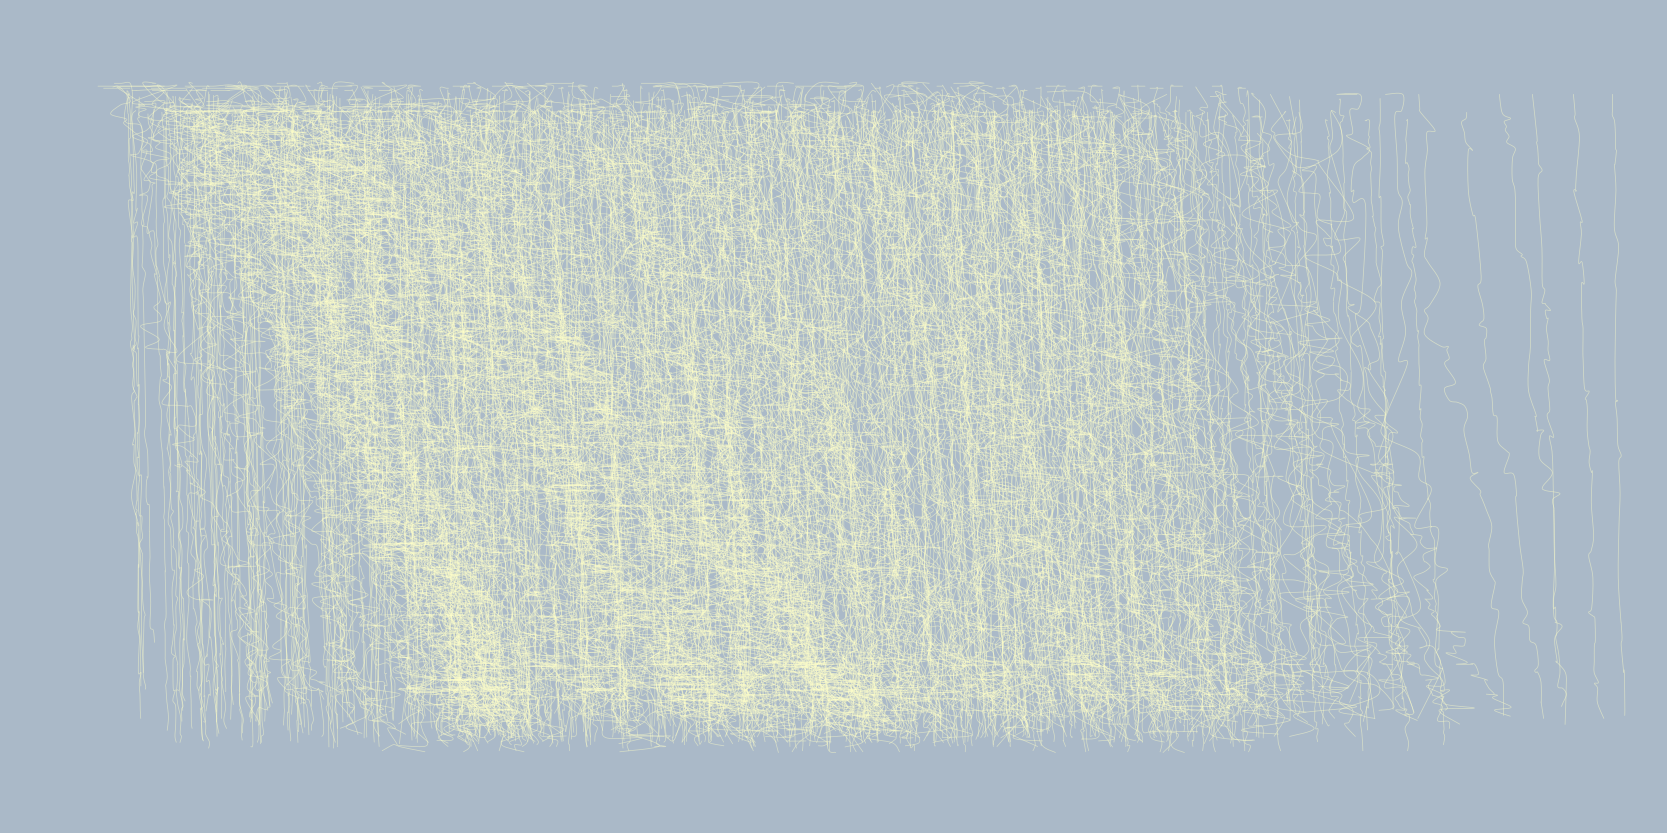

In [ ]:
from py5canvas import *
import random
import numpy as np

create_canvas(1667, 833)

background(170,185,200)
fill(250,255,200,125)
stroke(255,255,200,125)
stroke_weight(0.33)

# distance the vertical lines are apart
line_spacing = width/80; 

# initial pen position
x, y = 0, 0

# draws a curve connecting line points (nodes)
def draw_line(x_bias, x_random, sum_lin):
    stroke_weight(0.75)

    no_fill() # stops lines being filled in as a shape

    begin_shape()
    for i in range(len(sum_lin)):
        curve_vertex(x + x_random[i] + x_bias[i], sum_lin[i] + y_offset) # add together node position randomisations
    end_shape()

# [8,10,11,12,15], 15:12:11:10:8 polyrhythm
# alt extended values: [24,27,30,33,36,40,45], from heptatonic cluster ratios, scale: 1 2 3 ^4 5 6 7
polyrhythm_nodes = [24,27,30,33,36,40,45]

# initalise empty lists for use in calculate_lines
line_calcs = []
summed_line = []

def calculate_lines(): # todo: possibly separate into two functions calc and sum - better modularity
    global line_calcs, summed_line

    # reset global variables as empty lists
    line_calcs = []
    summed_line = []

    # loop for number of lines in horizontal drawing area
    for lin in range(int((width*0.33)/line_spacing)):
        summed_line.append([]) # create new nested array for each line
        
        # calculate y values for each component pulse in the polyrhythm 
        for i in range(len(polyrhythm_nodes)):
            calc_y = height * 0.1
            line_calcs.append([])
            for j in range(polyrhythm_nodes[i]):
                line_calcs[i].append(calc_y)
                calc_y += int(((height*0.8)-10)/polyrhythm_nodes[i])
                # print(calc_y)

        # sum calculated line nodes
        for i in range(len(polyrhythm_nodes)): # loop for number of nodes
            for j in range(polyrhythm_nodes[i]): # loop for specific node number values
            # 1/3 chance that a node is selected for use per component node in polyrhythm - random pattern generation
                node_select = np.random.normal(1.167,1.167) # probability of drawing node - was random.uniform(0,2.33)
                node_chance = micro_node_density(draw_pass,x) + macro_node_density(draw_pass)
                if node_select < node_chance: 
                    summed_line[lin].append(line_calcs[i][j])
            # limit gaussian distributions of probability within range
            if node_select < node_chance: 
                summed_line[lin].append((height*0.8)-5)   

        summed_line[lin].sort() # for readability when printing

macro_pos = 0
micro_pos = []
# determine which pass of the canvas to centre macro dynamic peak on
def dynamic_form(passes): 
    divisions = [0,1,2,3,4,5] # positions along the duration of the score (no. passes) the macro peak can occur

    macro_pos = int((passes/5) * random_choice(divisions)) # which pass to centre gaussian dynamic peak on

    for p in range(passes): # do for each pass
        micro_pos.append(int(((width*0.33)/5) * random.choice(divisions)))

    print(macro_pos, micro_pos)
            
    return [macro_pos, micro_pos] 

# calculate gaussian field centred on determined x position per pass
def gaussian_field(current_pos, centre, range):
    return np.exp(-((current_pos - centre)**2) / (2 * range**2)) 


# -- dynamic variations across all passes of the canvas -- 

def macro_x_variation(draw_pass):
    x_var_loc = 0
    x_var_scale = 0

    centre = macro_pos
    sigma = 2
    gaussian_weight = gaussian_field(draw_pass, centre, sigma)
    
    # prevent lines from becoming totally straight/nodeless by keeping gaussian_weight away from ~0.0
    if gaussian_weight < 0.075:
        gaussian_weight = 0.075

    # randomised x position and proabability
    x_var_loc = abs(gaussian_weight * np.random.normal(3, 2)) # old/alt: 11,6
    x_var_scale = abs(gaussian_weight * np.random.normal(5, 4)) # old/alt: 19,12

    return [x_var_loc, x_var_scale]

def macro_line_drift(draw_pass):
    x_bias_loc = 0
    x_bias_scale = 0

    dec_line_spacing = 0

    centre = macro_pos
    sigma = 2
    gaussian_weight = gaussian_field(draw_pass, centre, sigma)
    
    if gaussian_weight < 0.075:
        gaussian_weight = 0.075

    x_bias_loc = abs(gaussian_weight * np.random.normal(1.5, 1)) 
    x_bias_scale = abs(gaussian_weight * np.random.normal(2, 1)) 

    # dynamically decrease line_spacing along with increased drift
    dec_line_spacing = abs(gaussian_weight * np.random.normal(5.5, 2)) # at highest dynamics, no. to detract from line_spacing

    return [x_bias_loc, x_bias_scale, dec_line_spacing]

def macro_node_density(draw_pass):
    node_density = 0.0

    centre = macro_pos
    sigma = 2 # width of gaussian bell curve applied to passes of canvas (effect either side of centre pass)
    gaussian_weight = gaussian_field(draw_pass, centre, sigma)
    # print(gaussian_weight)
    
    if gaussian_weight < 0.075:
        gaussian_weight = 0.075

    node_density = abs(gaussian_weight * np.random.normal(0.5,0.33)) # old/alt: 0.5,0.33

    return node_density


#  -- dynamic variations per individual pass of the canvas --

def micro_x_variation(draw_pass, current_x):
    x_var_loc = 7
    x_var_scale = 12

    centre = micro_pos[draw_pass - 1]
    sigma = (width*0.33)/5 # gaussian application of dynamics either side of centre x value per pass
    gaussian_weight = gaussian_field(current_x, centre, sigma)

    if gaussian_weight < 0.05:
        gaussian_weight = 0.05

    x_var_loc = abs(gaussian_weight * np.random.normal(7,5)) # old/alt: 13,10
    x_var_scale = abs(gaussian_weight * np.random.normal(9,7)) # old/alt: 19,15

    return [x_var_loc, x_var_scale]

def micro_line_drift(draw_pass, current_x):
    x_bias_loc = 0.75
    x_bias_scale = 1.5

    dec_line_spacing = 0

    centre = micro_pos[draw_pass - 1]
    sigma = (width*0.33)/5
    gaussian_weight = gaussian_field(current_x, centre, sigma)

    if gaussian_weight < 0.05:
        gaussian_weight = 0.05

    x_bias_loc = abs(gaussian_weight * np.random.normal(2,4))
    x_bias_scale = abs(gaussian_weight * np.random.normal(4,3))

    dec_line_spacing = abs(gaussian_weight * np.random.normal(5.5, 2))

    return [x_bias_loc, x_bias_scale, dec_line_spacing]

def micro_node_density(draw_pass, current_x):
    node_density = 1.0
        
    centre = micro_pos[draw_pass - 1]
    sigma = (width*0.33)/5
    gaussian_weight = gaussian_field(current_x, centre, sigma)

    if gaussian_weight < 0.05:
        gaussian_weight = 0.05
    
    node_density = abs(gaussian_weight * np.random.normal(1.5, 0.5)) # old/alt: 1.5, 0.5

    return node_density


y_offset = 0
# draw polyrhythm nodes to connect lines between
def draw_nodes(): # todo: refactor into smaller functions?
    global x, line_spacing

    # # initialise colours
    # r_val = 255
    # g_val = 255
    # b_val = 200
    # alpha_val = 125

    # loop for number of lines in horizontal drawing space
    for lin in range(int((width*0.33)/line_spacing)):
        # line-node variation
        x_random = []

        # line-node drift
        x_bias = []
        bias_random = 0 
        micro_bias_space = micro_line_drift(draw_pass,x)[2]

        line_spacing = int(width/80 - micro_bias_space) 

        for i in range(len(summed_line[lin])): # draw by determined nodes 
            #stroke(r_val, g_val, b_val, alpha_val) # change stroke colour

            # apply dynamics
            x_var_loc = micro_x_variation(draw_pass,x)[0] + macro_x_variation(draw_pass)[0]
            x_var_scale = micro_x_variation(draw_pass,x)[1] + macro_x_variation(draw_pass)[1]

            x_bias_loc = micro_line_drift(draw_pass,x)[0] + macro_line_drift(draw_pass)[0]
            x_bias_scale = micro_line_drift(draw_pass,x)[1] + macro_line_drift(draw_pass)[1]
            # todo: make more efficient by only calling functions once? 

            x_random.append(np.random.normal(x_var_loc, x_var_scale)) 
            # generate randomised x vals, store in list

            bias_random += np.random.normal(x_bias_loc, x_bias_scale)
            x_bias.append(x + bias_random) 
            # lines trajectory gain skew towards to the right as line progressses
            
            stroke_weight(1)
            
            # # change colours & draw circles
            # fill(r_val, g_val, b_val, alpha_val)
            # circle(x + x_random[i] + x_bias[i], summed_line[lin][i] + y_offset, np.random.normal(1,0.5))
            # r_val -= 0.0001
            # g_val -= 0.0001
            # b_val += 0.008
            # alpha_val -= 0.01
            # print(r_val, g_val, b_val, alpha_val)

        # call line function
        draw_line(x_bias, x_random, summed_line[lin])
        # store all x values for a line to be called at once in the draw_line() loop per line

        # move line to the right
        x += line_spacing


# initialise passes of canvas
num_passes = 31
draw_pass = 0
# manage number of passes and line offsets, call functions to draw each pass
def draw_passes():
    global x, y_offset, draw_pass, alpha_val

    x_init = width * 0.033
    x_offset = 0

    x = x_init

    dynamic_form(num_passes)
    
    while draw_pass < num_passes: # higher than division of ~line_spacing to cause overlap
        # call functions to calculate and draw lines and nodes
        calculate_lines()
        draw_nodes()

        # alpha_val -= 5 # alter alpha value per pass
        # save(f'images/per_pass_score/current_generation_{draw_pass}.png') # save image for each pass
        
        draw_pass += 1
        x_offset += (line_spacing*1.104)/13 # adding interesting displacement in line overlap
        y_offset += random.uniform(-1, 3) # old/alt: np.random.normal(1,2)
        x = x_init + x_offset

        # print(f"pass made {draw_pass}") # print draw pass number

# save('images/current_generation.png') # save image of whole generation
    
draw_passes()

show()

# todo: dynamics skewed towards line density in the first 1/2 to 2/3 of draw area - possibly spread more evenly

--- 

## Reflection & Future Development

A major limitation of the code is inefficiency - it runs incredibly slowly. The current version taking approximately ten seconds to generate its output on my machine.
While this is acceptable for its current use, it is not ideal, especially for futer development. Currently versions are to be generated for use via drawing machine or as a complete whole, before being interpreted by a performer. However future developments my be hindered by this inefficiency. Anything involving live interpretation my be hindered, such as animating the drawing process or communicating data to another programme - e.g. SuperCollider via Open Sound Control (OSC).

Despite this shortcoming, the result is otherwise pleasing. I personally think the aesthetics of the score, process of generation, final output of lines and adaptabilty of values to produce varied outputs **ref example images?**, all live up to the original concept and vison for the piece. I believe, at a minimum within its intended use case, the outcome is fully effective and implementable as a graphic score for musical interpretation with or without instructions provided.
These, however, are my thoughts as the artist self-assessing the work. Testing the score's effectiveness in practice and reviewing by others from varied artistic, musical and computational backgrounds, will provide the most accurate feedback and assessment.

Beyond its current state, I would like to develop it further. Possible developents include animation of the drawing process, use of OSC and SuperCollider to generate sound from score derived data, and extension of line dimensions into three (3D) or four (4D) spacial dimensions projected onto the 2D canvas, via introduction of Z and W axis values.
These ideas provide possibilities to adapt the sound generaton and performance into new, more varied contexts, as well as introduce new textures and possibilities visually through rotating in and projecting down from higher spacial dimensions. New spacial possibilities enabling for development into installations, beyond the limitations of 2D drawing processes.
Some other much desired changes would be: improvement to the efficiency and speed of the code, as well as quality of life changes, including GUI or alternatives to easily tewak values in the generation processes, rather than directly in the code.

## Application in Practice

- playing it, using it as a score!

---

## References

- what has influenced the work, can provide more context to the reader



1. All the Lovers in the Night, Mieko Kawakami - page 147
- "In my chair, I surrendered myself to a world of sound that could only be described as sparkling. It made my head sway, and my breath grew deeper as my legs climbed up that evanescent staircase, each step a sheet of light. They would shimmer to life the second my sole made contact, then fizzle into stardust when I lifted my foot, only to be reborn as yet another step, gently showing me the way. That slowly winding spiral stairway of light ascended freely through the dark, and though I was unsure where it was taking me, or what I would find when I arrived, as long as the music was playing, I knew that there was nothing to fear, that I could go anywhere at all."